In [ ]:
#Rinoj Gautam (11599360)

Task 1 :Data Preparation

In [ ]:
import pandas as pd

import numpy as np
import csv
import matplotlib.pyplot as plt

def getData(filename):
  canData=[] #List to store the can data
  canData2 = [] #list to store only required data
  f = open(filename)
  #read_file = reader(f)
  read_file =f.readlines()

  #file = list(read_file)
  speed = []
  rpm = []
  i = 0
  count = 0
  sc = 0
  rc = 0
  newspeed = 0
  newrpm = 0
  speedContinues = False
  rpmContinues = False

  for row in read_file:
    #Change the positions of the values if needed
    record = {'count': 0, 'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 'change':row[33:41],'speed': 0,'rpm': 0,'attack':0}
    value = int(row[41:45],16)
    if record["PID"] == '254':#Processing of speed
      if value >= 4095:
        record["attack"] = 1
      record['speed'] =  (value * 0.62137119) /100
      speed.append(record['speed'])

      #print("i == ",i, "speed= ", record['value'])
      if speedContinues == False:
        newspeed = 0
        sc = 0


    if record["PID"] == '115': #Processing of RPM
      if value >= 65535:
        record["attack"] = 1
      record['rpm'] =  value * 2
      rpm.append(record['rpm'])

      if rpmContinues == False:
        newrpm = 0
        rc = 0
    #logic for keeping equal number of speed and rpm and fill the in-between speed and rpm values with previous speed and rpm
    if record['speed'] == 0 and sc > 0:
      record['speed'] = newspeed
      speedContinues = False
    else:
      newspeed = record['speed']
      sc = sc + 1
      speedContinues = True


    if record['rpm'] == 0 and rc > 0:
      record['rpm'] = newrpm
      rpmContinues = False
    else:
      newrpm = newrpm + record['rpm']
      rc = rc + 1
      rpmContinues = True

      #print("i == ",i, "RPM= ", record['value'])
    i = i+1
    record['count'] = i
    canData.append(record)
    if record["PID"] == '254' or record["PID"] == '115':
      canData2.append(record)
    record={}

  f.close()

  #Change the return value to speed or RPM if you want to return the other lists
  return canData,canData2


In [ ]:
# Getting the data and converting to dataframe and dropping the attack values
no_injection1,no_injection2= getData("CAN bus log - no injection of messages.log")
rpm_injection1,rpm_injection2 = getData("CAN Bus log - injection of RPM readings.log")
speed_injection1,speed_injection2 = getData("CAN Bus log - injection of FFF as the speed reading.log")

no_injection = pd.DataFrame(no_injection2).drop(['attack'],axis = 1)
rpm_injection = pd.DataFrame(rpm_injection2).drop(['attack'],axis = 1)
speed_injection = pd.DataFrame(speed_injection2).drop(['attack'],axis = 1)
no_injection.head()

,count,stamp,PID,const1,change,speed,rpm
0,7,1522004165.993044,115,4E00,02010000,0.0,636
1,21,1522004165.996440,254,918F,D364239E,0.0,636
2,34,1522004166.008046,115,4E00,02010000,0.0,640
3,56,1522004166.016375,254,918F,C364339E,0.0,640
4,66,1522004166.023050,115,4E00,02010000,0.0,640


Task 2: K Means Clustering

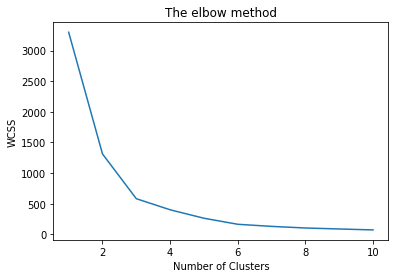

In [ ]:
# no injection data
# rpm
X = no_injection.loc[:,['count','rpm']]
#print(X)
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','rpm_T']] = sc.fit_transform(X[['count','rpm']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','rpm_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


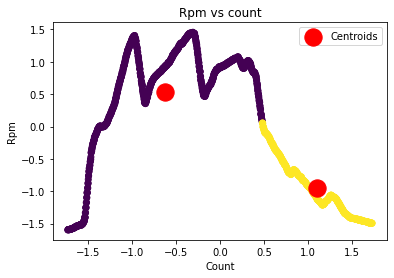

[[-0.62602099  0.53828565]
 [ 1.10604044 -0.95103153]]


In [ ]:

kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','rpm_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['rpm_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Rpm vs count')
plt.xlabel('Count')
plt.ylabel('Rpm')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

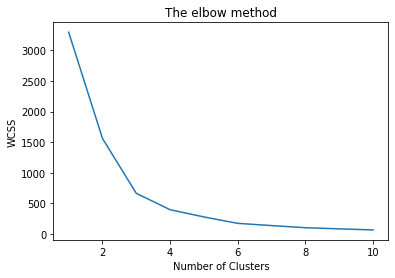

In [ ]:
#no injection
#speed
X = no_injection.loc[:,['count','speed']]
#print(X)
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','speed_T']] = sc.fit_transform(X[['count','speed']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','speed_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

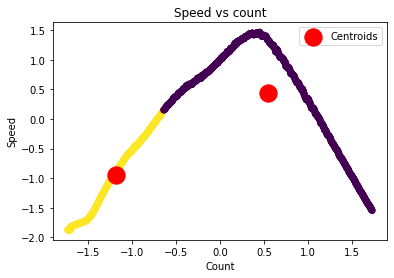

[[ 0.54513565  0.43179224]
 [-1.1869042  -0.94012568]]


In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','speed_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['speed_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Speed vs count')
plt.xlabel('Count')
plt.ylabel('Speed')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

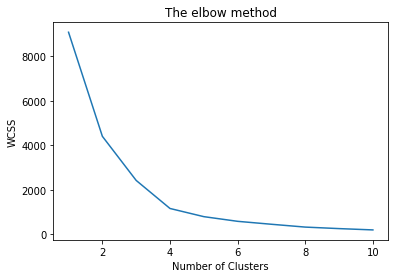

In [ ]:
#rpm injection
#rpm
X = rpm_injection.loc[:,['count','rpm']]
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','rpm_T']] = sc.fit_transform(X[['count','rpm']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','rpm_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

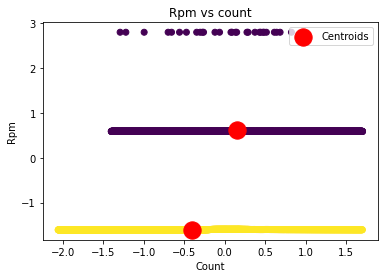

[[ 0.15100212  0.60489717]
 [-0.40000401 -1.60237017]]


In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','rpm_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['rpm_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Rpm vs count')
plt.xlabel('Count')
plt.ylabel('Rpm')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

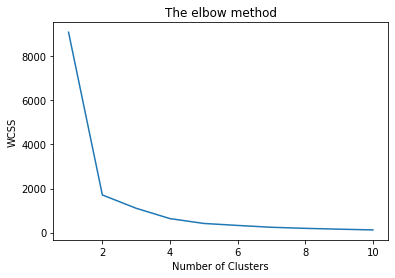

In [ ]:
#rpm injection
#speed
X = rpm_injection.loc[:,['count','speed']]
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','speed_T']] = sc.fit_transform(X[['count','speed']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','speed_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

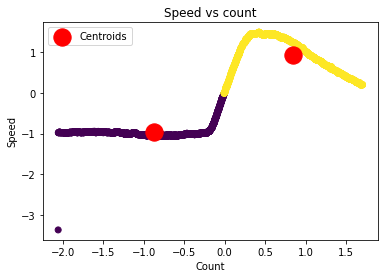

[[-0.87031173 -0.95512353]
 [ 0.84650381  0.92899553]]


In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','speed_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['speed_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Speed vs count')
plt.xlabel('Count')
plt.ylabel('Speed')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

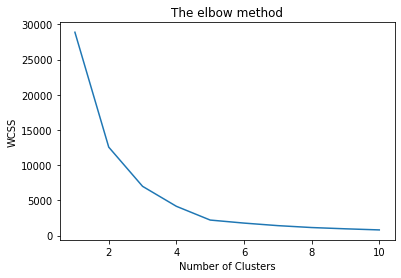

In [ ]:
#speed injection
#rpm
X = speed_injection.loc[:,['count','rpm']]
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','rpm_T']] = sc.fit_transform(X[['count','rpm']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','rpm_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


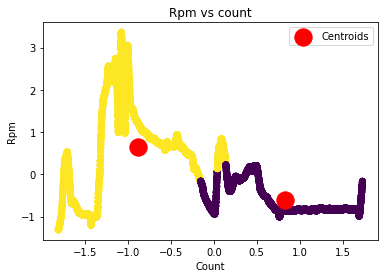

[[ 0.8259832  -0.61204131]
 [-0.88292715  0.65423593]]


In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','rpm_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['rpm_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Rpm vs count')
plt.xlabel('Count')
plt.ylabel('Rpm')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

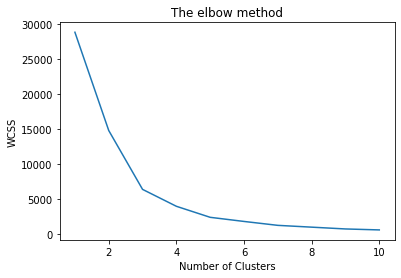

In [ ]:
#speed injection
#speed
X = speed_injection.loc[:,['count','speed']]
#first we do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['count_T','speed_T']] = sc.fit_transform(X[['count','speed']])
#print(X)
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=42)
  kmeans.fit(X[['count_T','speed_T']])
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

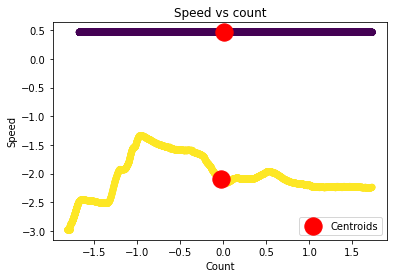

[[ 0.00753582  0.46686768]
 [-0.03371545 -2.088777  ]]


In [ ]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++', random_state=42 )
kmeans.fit(X[['count_T','speed_T']])
X['labels']= kmeans.labels_
#print(X)
plt.scatter(x = X['count_T'],y = X['speed_T'],c = X['labels'])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Speed vs count')
plt.xlabel('Count')
plt.ylabel('Speed')
plt.legend()
plt.show()
print(kmeans.cluster_centers_)

Task 3: Isolation Forest Algorithm

In [ ]:
#no injection
#rpm
from sklearn.ensemble import IsolationForest
features = ['count','rpm']
X  = no_injection.loc[:,['count','rpm']]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.01))
cluster1.fit(X[['rpm']])

X['scores']=cluster1.decision_function(X[['rpm']])
X['anamoly']=cluster1.predict(X[['rpm']])
X.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


,count,rpm,scores,anamoly
0,7,636,-0.007893,-1
1,21,636,-0.007893,-1
2,34,640,0.008324,1
3,56,640,0.008324,1
4,66,640,0.008324,1
5,85,640,0.008324,1
6,92,638,-0.003134,-1
7,111,638,-0.003134,-1
8,125,638,-0.003134,-1
9,139,640,0.008324,1


In [ ]:
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)


     count   rpm    scores  anamoly
0        7   636 -0.007893       -1
1       21   636 -0.007893       -1
6       92   638 -0.003134       -1
7      111   638 -0.003134       -1
8      125   638 -0.003134       -1
657   9551  2546 -0.001433       -1
662   9626  2562 -0.006687       -1
663   9644  2562 -0.006687       -1
667   9698  2562 -0.006687       -1
668   9718  2562 -0.006687       -1
672   9770  2564 -0.016714       -1
673   9784  2564 -0.016714       -1
678   9857  2570 -0.024045       -1
681   9903  2562 -0.006687       -1
682   9923  2562 -0.006687       -1


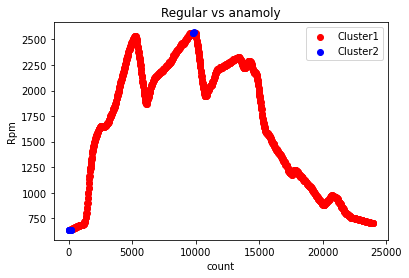

In [ ]:
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['rpm'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['rpm'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Rpm')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


      count     speed    scores  anamoly
0         7  0.000000 -0.118735       -1
1        21  0.000000 -0.118735       -1
2        34  0.000000 -0.118735       -1
3        56  0.000000 -0.118735       -1
4        66  0.000000 -0.118735       -1
...     ...       ...       ...      ...
1644  23894  3.144138 -0.010382       -1
1645  23912  3.144138 -0.010382       -1
1646  23926  3.038505 -0.011779       -1
1647  23939  3.038505 -0.011779       -1
1648  23962  2.932872 -0.012230       -1

[165 rows x 4 columns]


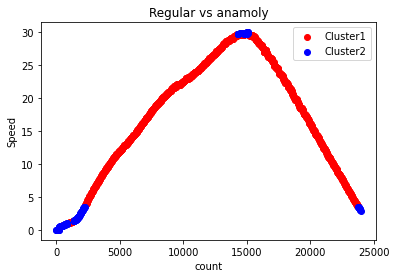

In [ ]:
#no injection
#speed

features = ['count','speed']
X  = no_injection.loc[:,features]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.1))
cluster1.fit(X[['speed']])

X['scores']=cluster1.decision_function(X[['speed']])
X['anamoly']=cluster1.predict(X[['speed']])
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['speed'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['speed'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Speed')
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


      count     rpm    scores  anamoly
511    6174  262140 -0.146894       -1
606    6744  262140 -0.146894       -1
910    8566  262140 -0.146894       -1
1309  10951  262140 -0.146894       -1
1366  11293  262140 -0.146894       -1
1499  12086  262140 -0.146894       -1
1613  12770  262140 -0.146894       -1
1784  13793  262140 -0.146894       -1
1841  14136  262140 -0.146894       -1
1879  14362  262140 -0.146894       -1
1898  14476  262140 -0.146894       -1
2061  15448    1466 -0.001396       -1
2066  15475    1474 -0.002215       -1
2071  15508    1484 -0.001301       -1
2080  15563    1514 -0.001369       -1
2085  15592    1524 -0.000456       -1
2088  15613  262140 -0.146894       -1
2090  15623    1530 -0.000456       -1
2164  16070  262140 -0.146894       -1
2354  17205  262140 -0.146894       -1
2373  17317  262140 -0.146894       -1
2430  17661  262140 -0.146894       -1
2449  17771  262140 -0.146894       -1
2531  18259    1520 -0.000912       -1
2546  18353    1488 -0.00

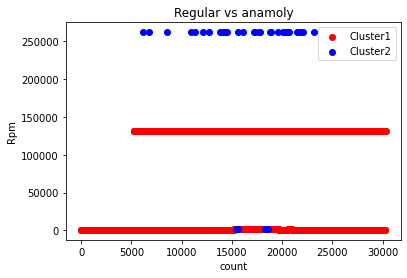

In [ ]:
#rpm injection
#rpm

X  = rpm_injection.loc[:,['count','rpm']]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.01))
cluster1.fit(X[['rpm']])

X['scores']=cluster1.decision_function(X[['rpm']])
X['anamoly']=cluster1.predict(X[['rpm']])
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['rpm'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['rpm'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Rpm')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


      count     speed    scores  anamoly
2058  15429  5.766325 -0.000422       -1
2059  15443  5.766325 -0.000422       -1
2060  15444  5.766325 -0.000422       -1
2061  15448  5.766325 -0.000422       -1
2062  15456  5.766325 -0.000422       -1
2063  15467  5.766325 -0.000422       -1
2064  15468  5.834675 -0.006315       -1
2065  15470  5.834675 -0.006315       -1
2066  15475  5.834675 -0.006315       -1
2067  15483  5.834675 -0.006315       -1
2068  15488  5.834675 -0.006315       -1
2069  15499  5.834675 -0.006315       -1
2070  15502  5.834675 -0.006315       -1
2071  15508  5.834675 -0.006315       -1
2072  15517  5.834675 -0.006315       -1
2073  15522  5.834675 -0.006315       -1
2074  15524  5.834675 -0.006315       -1
2075  15531  5.834675 -0.006315       -1
2076  15541  5.834675 -0.006315       -1
2077  15546  5.903026 -0.002568       -1
2078  15552  5.903026 -0.002568       -1
2079  15559  5.903026 -0.002568       -1
2080  15563  5.903026 -0.002568       -1
2081  15572  5.9

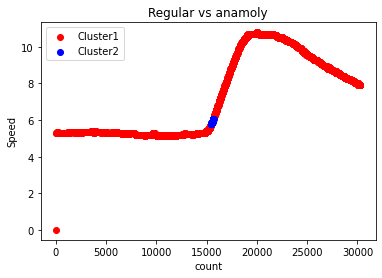

In [ ]:
#rpm injection
#speed
X  = rpm_injection.loc[:,['count','speed']]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.01))
cluster1.fit(X[['speed']])

X['scores']=cluster1.decision_function(X[['speed']])
X['anamoly']=cluster1.predict(X[['speed']])
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['speed'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['speed'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Speed')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


      count   rpm    scores  anamoly
0        16   626 -0.003453       -1
1        34   626 -0.003453       -1
2        41   624 -0.003453       -1
3        60   624 -0.003453       -1
4        69   624 -0.003453       -1
...     ...   ...       ...      ...
3043  20287  1674 -0.002419       -1
3044  20296  1674 -0.002419       -1
3045  20304  1674 -0.002419       -1
3046  20306  1674 -0.002419       -1
3047  20308  1674 -0.002419       -1

[137 rows x 4 columns]


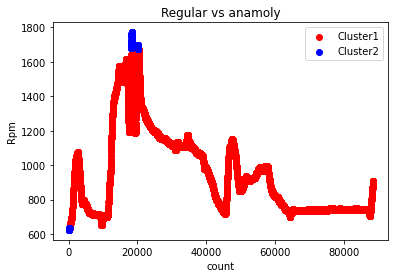

In [ ]:
#speed injection
#rpm
X  = speed_injection.loc[:,['count','rpm']]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.01))
cluster1.fit(X[['rpm']])

X['scores']=cluster1.decision_function(X[['rpm']])
X['anamoly']=cluster1.predict(X[['rpm']])
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['rpm'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['rpm'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Rpm')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


       count     speed    scores  anamoly
0         16  0.000000 -0.310178       -1
1         34  0.000000 -0.310178       -1
2         41  0.000000 -0.310178       -1
3         60  0.000000 -0.310178       -1
4         69  0.000000 -0.310178       -1
...      ...       ...       ...      ...
14400  88269  5.449425 -0.081044       -1
14406  88307  5.449425 -0.081044       -1
14407  88313  5.449425 -0.081044       -1
14418  88382  5.486708 -0.059424       -1
14430  88464  5.486708 -0.059424       -1

[2637 rows x 4 columns]


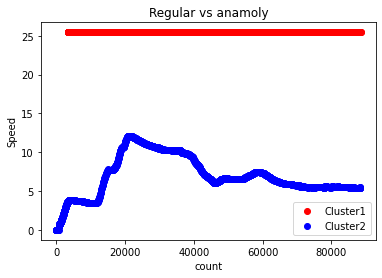

In [ ]:
#speed injection
#speed

X  = speed_injection.loc[:,['count','speed']]


cluster1 = IsolationForest(n_estimators=100, contamination=float(0.5))
cluster1.fit(X[['speed']])

X['scores']=cluster1.decision_function(X[['speed']])
X['anamoly']=cluster1.predict(X[['speed']])
anamoly = X.loc[X['anamoly']==-1]
anamoly_index = list(anamoly.index)
print(anamoly)
#scatter plot
plt.scatter(X[X['anamoly']==1]['count'],X[X['anamoly']==1]['speed'],c = 'red',label ='Cluster1' )
plt.scatter(X[X['anamoly']==-1]['count'],X[X['anamoly']==-1]['speed'],c = 'blue',label ='Cluster2' )
plt.legend()
plt.title('Regular vs anamoly')
plt.xlabel('count')
plt.ylabel('Speed')
plt.show()

Task 5: Hidden markov Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 21.9 MB/s 


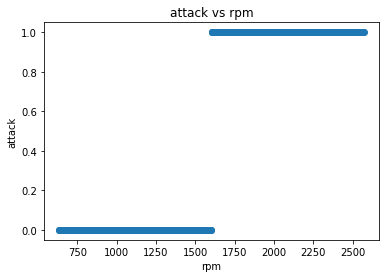

In [ ]:
!pip install hmmlearn
from hmmlearn import hmm

#no injection
#rpm
X = no_injection[['rpm']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag")
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs rpm')
plt.xlabel('rpm')
plt.ylabel('attack')
plt.show()

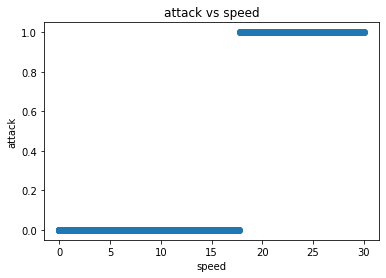

In [ ]:
#no injection
#speed
X = no_injection[['speed']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag",n_iter = 42, random_state = 100)
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs speed')
plt.xlabel('speed')
plt.ylabel('attack')
plt.show()

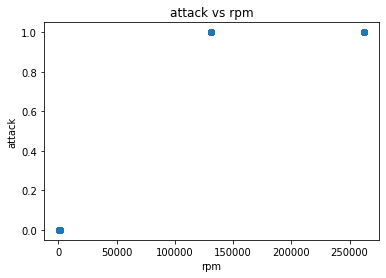

In [ ]:
#rpm injection
#rpm
X = rpm_injection[['rpm']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag",n_iter = 42, random_state = 100)
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs rpm')
plt.xlabel('rpm')
plt.ylabel('attack')
plt.show()

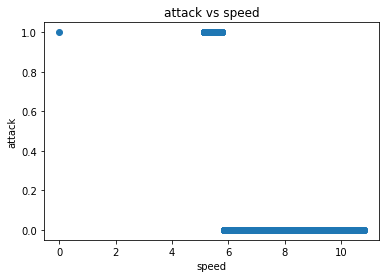

In [ ]:
#rpm injection
#speed
X = rpm_injection[['speed']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag",n_iter = 42, random_state = 100)
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs speed')
plt.xlabel('speed')
plt.ylabel('attack')
plt.show()

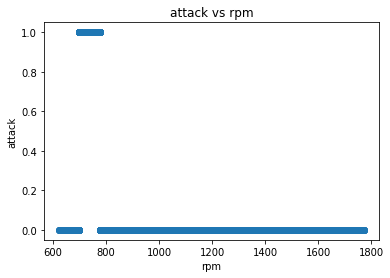

In [ ]:
#speed injection
#rpm
X = speed_injection[['rpm']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag",n_iter = 42, random_state = 100)
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs rpm')
plt.xlabel('rpm')
plt.ylabel('attack')
plt.show()

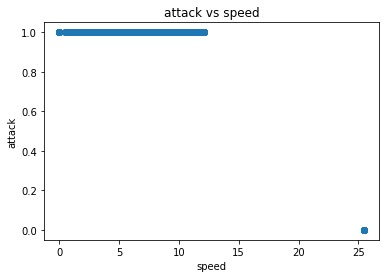

In [ ]:
#speed injection
#speed
X = speed_injection[['speed']]

hcluster = hmm.GaussianHMM(n_components=2, covariance_type="diag")
hcluster.fit(X)

Y = hcluster.predict(X)
plt.scatter(X,Y)
plt.title('attack vs speed')
plt.xlabel('speed')
plt.ylabel('attack')
plt.show()